In [22]:
# 导入需要的包
import numpy as np
import torch
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
import os
from torchvision import datasets, models, transforms, utils
import time

### Step1. 准备数据

In [23]:
# 数据归一化
transform = transforms.Compose([transforms.Resize(224),# 因为alexnet需要较大的图进行后续的卷积操作，故这里将原图扩大到224
                               transforms.ToTensor(),
                               transforms.Normalize(mean=[0.1307], std=[0.3081])])

In [24]:
# 下载训练和测试数据
train_data = datasets.MNIST(root='./data',
                      transform=transform,
                      train=True,
                      download=True)
test_data = datasets.MNIST(root='./data',
                      transform=transform,
                      train=False)

In [25]:
# 输出一个样本，一个样本是由一张图片和对应的标签组成的
for i, data in enumerate(train_data):
    print(data)
    break
# 输出训练和测试图片数
print(len(train_data))
print(len(test_data))

(tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 5)
60000
10000


In [ ]:
# 加载训练和测试数据
train_loader = torch.utils.data.DataLoader(train_data, batch_size=400, shuffle=True, num_workers=8)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=400, shuffle=True, num_workers=8)

In [57]:
# 查看一个batch的数据
data_iter = iter(train_loader)
images, labels = data_iter.next()
print(data)

# print(images)
# print(labels)

Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/pytorch/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/envs/pytorch/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/envs/pytorch/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/envs/pytorch/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/opt/anaconda3/envs/pytorch/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/envs/pytorch/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/envs/pytorch/lib/python3.8/multiprocessing/connection.py", 

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.42

In [58]:
# 查看train_loader和test_loader的长度
print(len(train_loader))
print(len(test_loader))
# 查看train_loader和test_loader的维度
for i, data in enumerate(train_loader):
    print(data[0].shape)
    break

for i, data in enumerate(test_loader):
    print(data[0].shape)
    break

150
25
torch.Size([400, 1, 224, 224])
torch.Size([400, 1, 224, 224])


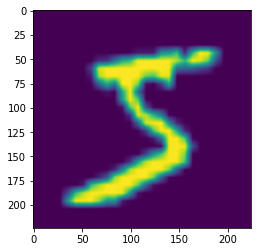

In [59]:
# 查看一张图片
oneimg, label = train_data[0]
oneimg = oneimg.numpy().transpose(1,2,0)
mean = [0.5]
std = [0.5]
oneimg = oneimg * std + mean # 反归一化
oneimg.resize(224,224)
plt.imshow(oneimg)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


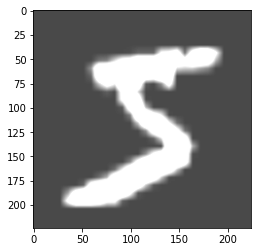

In [60]:
# 从三维生成一张黑白图片
oneimg, label = train_data[0]
grid = utils.make_grid(oneimg)
grid = grid.numpy().transpose(1,2,0)
mean = [0.5]
std = [0.5]
grid = grid * std + mean
plt.imshow(grid)
plt.show()

tensor(4) tensor(2) tensor(5) tensor(0) tensor(5) tensor(4) tensor(1) tensor(7) 
tensor(5) tensor(1) tensor(4) tensor(0) tensor(3) tensor(0) tensor(4) tensor(9) 
tensor(1) tensor(0) tensor(3) tensor(8) tensor(7) tensor(8) tensor(2) tensor(4) 
tensor(5) tensor(5) tensor(2) tensor(1) tensor(6) tensor(7) tensor(8) tensor(7) 
tensor(8) tensor(2) tensor(5) tensor(5) tensor(3) tensor(3) tensor(5) tensor(8) 
tensor(6) tensor(0) tensor(2) tensor(0) tensor(4) tensor(4) tensor(2) tensor(4) 
tensor(1) tensor(9) tensor(6) tensor(4) tensor(0) tensor(0) tensor(6) tensor(6) 
tensor(3) tensor(5) tensor(8) tensor(0) tensor(4) tensor(7) tensor(6) tensor(9) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


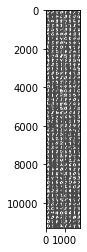

In [61]:
# 输出一个batch的图片和标签
images, labels = next(iter(train_loader))
img = utils.make_grid(images)
img = img.numpy().transpose(1,2,0)
std = [0.5]
mean = [0.5]
img = img * std + mean
for i in range(64):
    print(labels[i], end=' ')
    i += 1
    if i % 8 == 0:
        print(end='\n')
plt.imshow(img)
plt.show()

### Step 2. 网络搭建

1. 定义AlexNet
（五个卷积层, 三个全连接层）

In [62]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 96, 11, 4, 2), # in_channels, out_channels, kernel_size, stride, padding
            nn.ReLU(),
            nn.MaxPool2d(3, 2), # kernel_size, stride
            # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
            nn.Conv2d(96, 256, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
            # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步增大了输出通道数。
            nn.Conv2d(256, 384, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )
        self.fc = nn.Sequential(
            nn.Linear(256*6*6, 4096), # 这里的5为经过5层卷积层之后的特征图大小，需根据实际情况更改
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10), # 这里的10表示10分类，可根据实际的需求更改这个值
        )

    def forward(self, img):
        feature = self.conv(img)
        output = self.fc(feature.view(img.shape[0], -1))
        return output
    
net = AlexNet()

2.定义损失函数和优化器

In [63]:
import torch.optim as optim
# loss
crition = nn.CrossEntropyLoss() # crossentropyloss里面封装了softmax,如果使用NLLLoss的话需要在定义的网络输出后面使用softmax将其转化为概率分布，然后预测的结果与labels做NLLLoss
# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Step 3. 训练模型
1. 加载训练数据与标签，将其放置在GPU上
2. 前向+后向+优化
3. 保存模型

In [ ]:
import time
train_accs = []
train_loss = []
test_accs = []
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

net = net.to(device) # 将模型放在device上
net.train()

start_time  = time.time()
print('start training...\n')
for epoch in range(10): # 一共训练10个epoch
    print(f'start training the {epoch} epoch...')
    running_loss = 0
    for i, data in enumerate(train_loader, 0):
        print('iteration: ', i)
        # data的格式[inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device) # 将样本放在device上
        # 初始为0， 清除上个batch的梯度信息
        optimizer.zero_grad()
        # 前向+后向+优化
        outputs = net(inputs)
        loss = crition(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 打印10个batch输出的平均loss
        running_loss += loss
        if i%10 == 9:
            print('[%d, %d] loss: % .3f' % (epoch+1, i+1, running_loss/100))
            running_loss = 0
        # 在training_loss中每个batch添加当前的loss
        train_loss.append(loss.item())
        
        #一个batch中的准确率
        correct = 0
        total = 0
        _, predicted = torch.max(outputs.data, 1) # predicted是output中的最大值对应的索引
        total = labels.size(0) # labels的长度
        correct = (predicted==labels).sum().item() # 一个batch中预测正确的数量
        train_accs.append(100*correct/total)
        
end_time = time.time()
total_time = end_time = start_time
print('Finished Training!\n')
print('Totoal Consuming Time is: ', total_time)

start training...

start training the 0 epoch...
iteration:  0
iteration:  1
iteration:  2
iteration:  3


In [18]:
path = './mnist_net_alexnet.pth'
torch.save(net.state_dict(), path)

### Step 4. 评估模型

画图

In [14]:
def draw_train_process(title, iters, costs, accs, label_cost, label_acc):
    plt.title(title, fontsize=24)
    plt.xlabel('iter', fontsize=20)
    plt.ylabel('acc(\%)', fontsize=20)
    plt.plot(iters, costs, color='red', label=label_cost)
    plt.plot(iters, accs, color='green', label=label_acc)
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
train_iters = range(len(train_accs))
draw_train_process('Training', train_iters, train_loss, train_accs, 'training_loss', 'training_acc')

NameError: name 'train_accs' is not defined

测试一个batch的分类情况

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


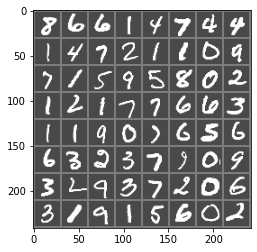

Ground Truth:  8 6 6 1 4 7 4 4 1 4 7 2 1 1 0 9 7 1 5 9 5 8 0 2 1 2 1 7 7 6 6 3 1 1 9 0 7 6 5 6 6 3 2 3 7 9 0 9 3 2 9 3 7 2 0 6 3 1 9 1 5 6 0 2


In [21]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
test_img = utils.make_grid(images)
test_img = test_img.numpy().transpose(1,2,0)
std = [0.5]
mean = [0.5]
test_img = test_img * std + mean
plt.imshow(test_img)
plt.show()
print('Ground Truth: ', ' '.join('%d' % labels[j] for j in range(64)))

In [22]:
test_net = MyCNN()
test_net.load_state_dict(torch.load(path))
outputs = test_net(images)
# print(outputs)
# print(outputs.size())

输出的是每一类对应的概率，所以需要选择max来确定最终输出的类别
dim=1表示选择行的最大索引

In [23]:
_, predicted = torch.max(outputs, dim=1)
print('Predicted: ', ' '.join('%d' % predicted[j] for j in range(64)))

Predicted:  8 6 6 1 4 7 4 4 1 4 7 2 1 8 0 9 7 1 5 9 5 8 0 2 1 2 1 7 7 6 6 3 1 1 9 0 9 6 5 6 6 3 2 3 7 9 0 9 3 2 9 3 7 2 0 6 3 1 9 1 5 6 0 2


测试集上面整体的准确率

In [24]:
correct = 0
total = 0
with torch.no_grad(): # 进行评测时网络不更新梯度
    for images, labels in test_loader:
        outputs = test_net(images)
        _, predicts = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicts == labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100*correct/total))

Accuracy of the network on the test images: 98 %


10个类别的准确率

In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad(): # 进行评测时网络不更新梯度
    for data in test_loader:
        images, labels = data
#         print(labels)
        outputs = test_net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted==labels)
#         print(c)
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %d : %32d %%' % (i, 100*class_correct[i] /class_total[i]))
            

Accuracy of 0 :                               99 %
Accuracy of 1 :                               98 %
Accuracy of 2 :                               99 %
Accuracy of 3 :                              100 %
Accuracy of 4 :                               99 %
Accuracy of 5 :                               96 %
Accuracy of 6 :                               99 %
Accuracy of 7 :                               93 %
Accuracy of 8 :                               96 %
Accuracy of 9 :                               99 %
